In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 116s 1us/step


In [4]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

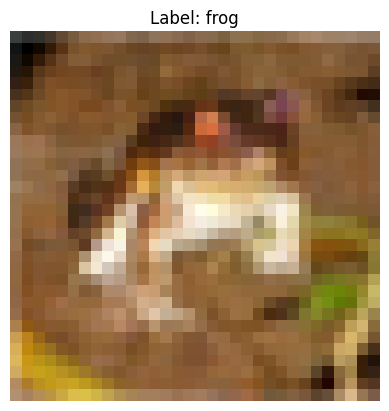

In [5]:
# Show one image with label
index = 0  # Change this to view a different image
plt.imshow(x_train[index])
plt.title(f"Label: {class_names[y_train[index][0]]}")
plt.axis('off')
plt.show()

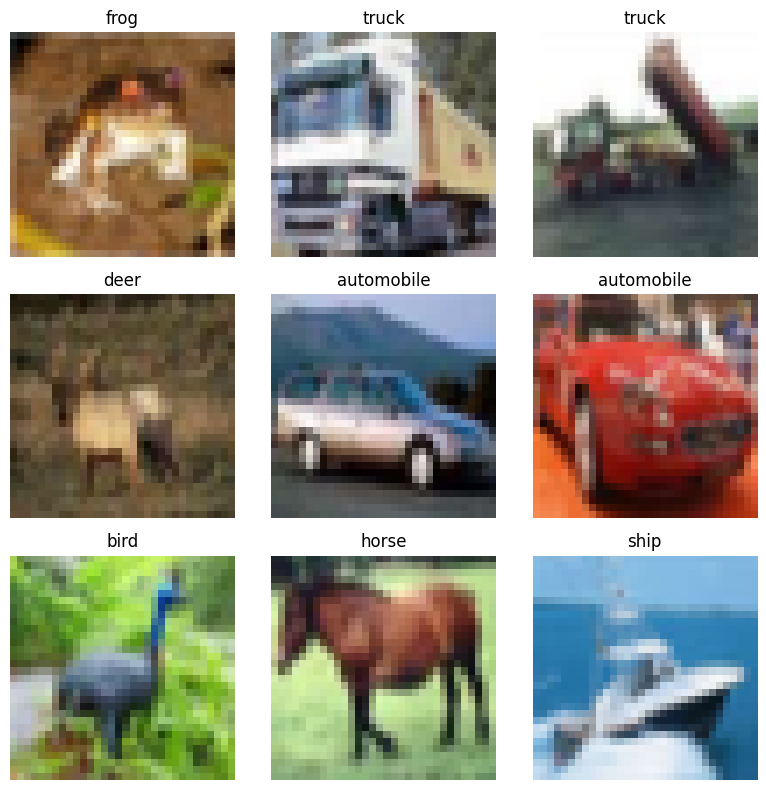

In [6]:
# View first 9 images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


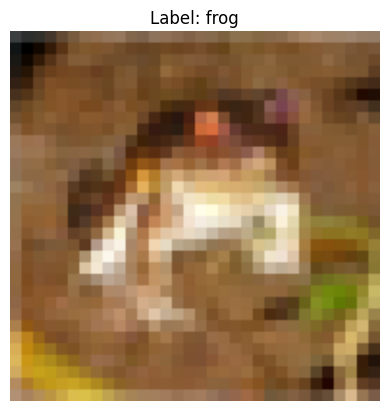

In [7]:
from PIL import Image
import numpy as np

# Select one image
img_array = x_train[0]

# Convert to PIL image
img = Image.fromarray(img_array)

# Resize to 128x128 for better clarity
img = img.resize((128, 128), Image.NEAREST)  # You can try BILINEAR or BICUBIC for smoother scaling

# Show image
plt.imshow(img)
plt.title(f"Label: {class_names[y_train[0][0]]}")
plt.axis('off')
plt.show()


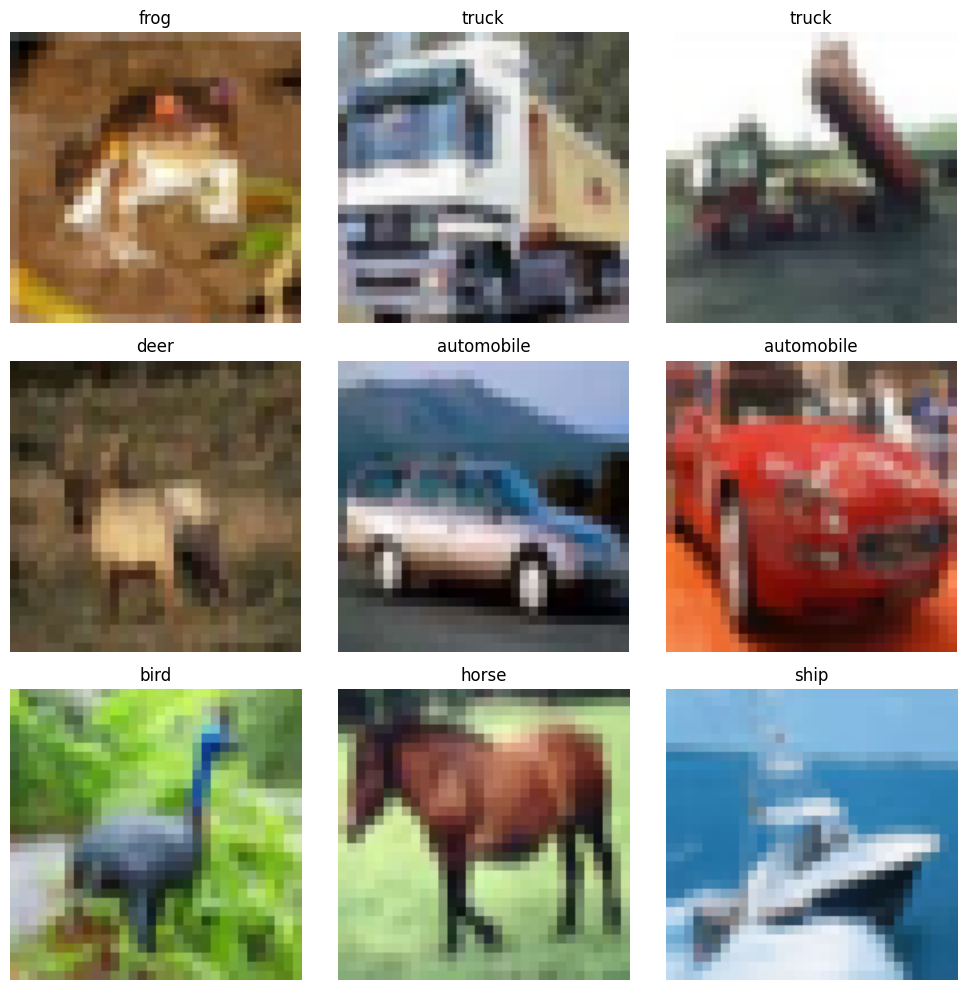

In [8]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img = Image.fromarray(x_train[i])
    img = img.resize((128, 128), Image.NEAREST)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2282 - loss: 2.6902 - val_accuracy: 0.4730 - val_loss: 1.4498
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5037 - loss: 1.3708 - val_accuracy: 0.5565 - val_loss: 1.2580
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5778 - loss: 1.1965 - val_accuracy: 0.5907 - val_loss: 1.1699
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6220 - loss: 1.0735 - val_accuracy: 0.6173 - val_loss: 1.0944
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6539 - loss: 0.9898 - val_accuracy: 0.6280 - val_loss: 1.1006
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6804 - loss: 0.9150 - val_accuracy: 0.6497 - val_loss: 1.0441
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7016 - loss: 0.8573 - val_accuracy: 0.6497 - val_loss: 1.0615
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7225 -

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 1s - 4ms/step - accuracy: 0.6563 - loss: 1.0607

Test accuracy: 0.66


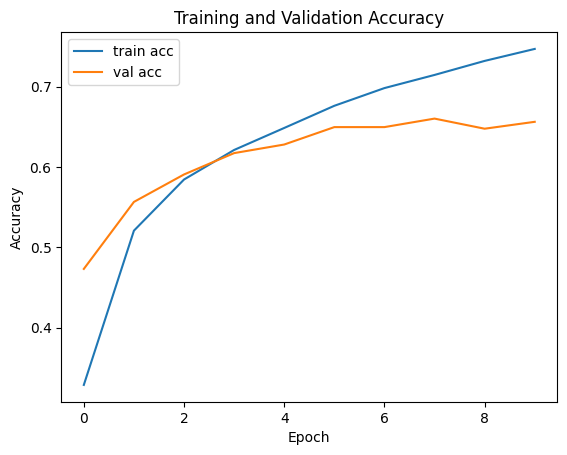

In [16]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/tmp/ipykernel_1396/1901045128.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]}, Actual: {class_names[int(y_test[index])]}")


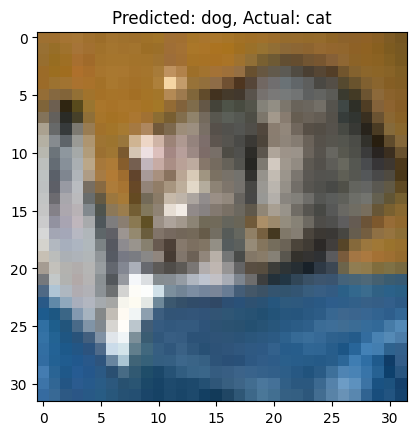

In [17]:
# Make predictions
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test)

# Show a prediction example
def show_prediction(index):
    plt.imshow(x_test[index])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]}, Actual: {class_names[int(y_test[index])]}")
    plt.show()

# Display prediction for the first image
show_prediction(0)